## 1. Biblioteki, wczytanie danych

### 1.1 Biblioteki

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

### 1.2 Wczytywanie danych

In [38]:
# Wczytywanie danych treningowych
train_data = pd.read_csv('data/train.csv')

# Wczytywanie danych testowych
test_data = pd.read_csv('data/test.csv')


## 2. Wizualizacja danych

### 2.1. Statystyki ogólne

In [39]:
# Wyświetlenie statystyk dla danych treningowych
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2. Procent uzupełnionych danych

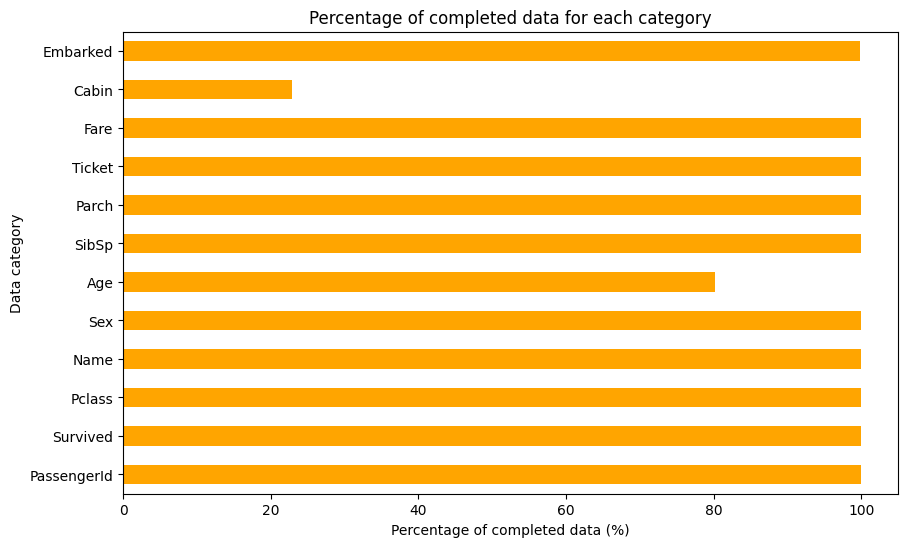

In [40]:
# Obliczanie procentu uzupełnionych danych dla każdej kolumny
filled_percentages = train_data.notnull().mean() * 100

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
filled_percentages.plot(kind='barh', color='orange')
plt.title('Percentage of completed data for each category')
plt.xlabel('Percentage of completed data (%)')
plt.ylabel('Data category')
plt.show()

### 2.3. Odsetek ocalałych według klasy pasażerskiej

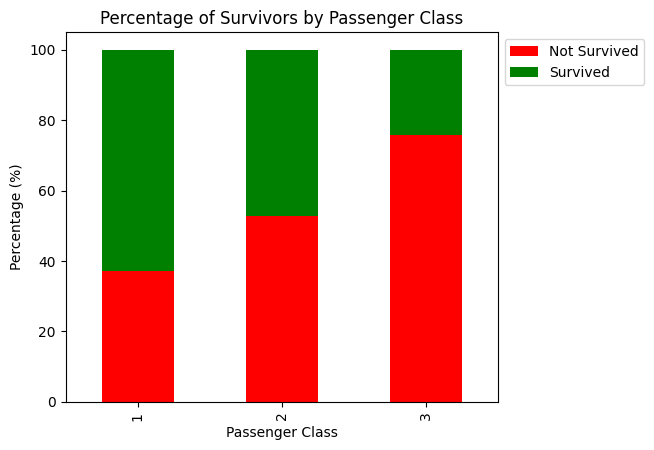

In [41]:
# Grupowanie danych według klasy pasażerskiej i statusu przeżycia
survival_by_class = train_data.groupby(['Pclass', 'Survived']).size().unstack()

# Obliczanie odsetka przeżyłych i nieprzeżyłych w każdej klasie pasażerskiej
survival_by_class_percentage = survival_by_class.div(survival_by_class.sum(axis=1), axis=0) * 100

# Tworzenie wykresu słupkowego
survival_by_class_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])

# Dodanie tytułu i etykiet osi
plt.title('Percentage of Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage (%)')

# Dodanie legendy
plt.legend(['Not Survived', 'Survived'], loc='upper left', bbox_to_anchor=(1, 1))

# Dostosowanie rozmiaru wykresu
plt.subplots_adjust(right=0.8)

# Wyświetlenie wykresu
plt.show()

### 2.4 Odsetek ocalałych według płci

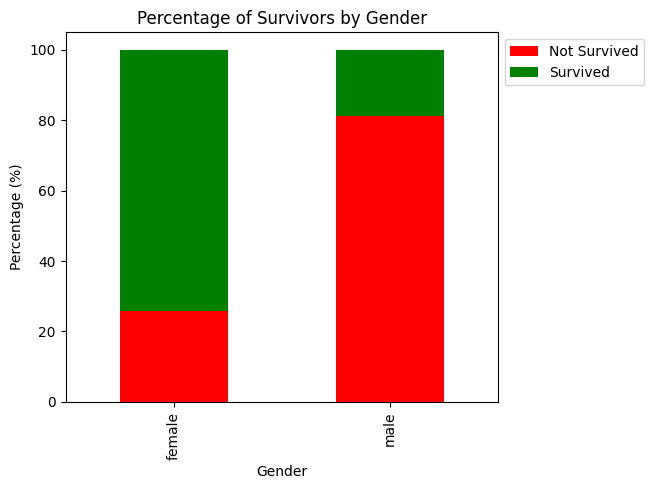

In [42]:
# Grupowanie danych według płci i statusu przeżycia
survival_by_sex = train_data.groupby(['Sex', 'Survived']).size().unstack()

# Obliczanie odsetka przeżyłych i nieprzeżyłych w każdej grupie płci
survival_by_sex_percentage = survival_by_sex.div(survival_by_sex.sum(axis=1), axis=0) * 100

# Tworzenie wykresu słupkowego
survival_by_sex_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])

# Dodanie tytułu i etykiet osi
plt.title('Percentage of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')

# Dodanie legendy
plt.legend(['Not Survived', 'Survived'], loc='upper left', bbox_to_anchor=(1, 1))

# Dostosowanie rozmiaru wykresu
plt.subplots_adjust(right=0.8)

# Wyświetlenie wykresu
plt.show()

### 2.5. Odsetek ocalałych według grup wiekowych

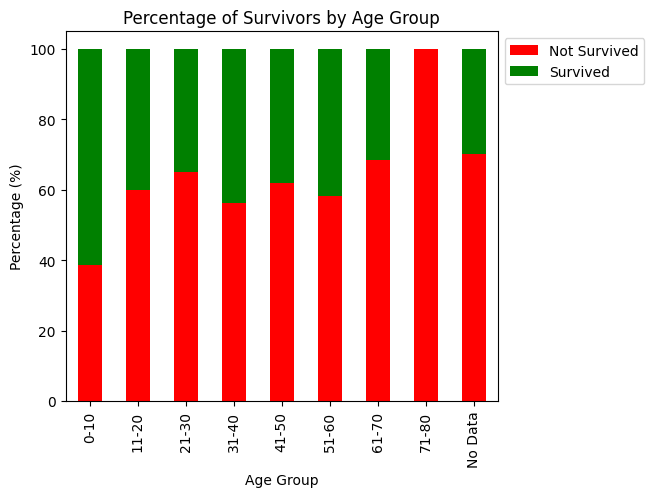

In [43]:
# Tworzenie przedziałów wiekowych
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Przypisanie kategorii 'No Data' dla brakujących wartości w kolumnie 'Age'
train_data['AgeGroup'] = pd.cut(train_data['Age'].fillna(-1), bins=age_bins, labels=age_labels, right=False)
train_data['AgeGroup'] = train_data['AgeGroup'].cat.add_categories('No Data')
train_data['AgeGroup'] = train_data['AgeGroup'].fillna('No Data')

# Grupowanie danych według przedziałów wiekowych i statusu przeżycia
survival_by_age = train_data.groupby(['AgeGroup', 'Survived'], observed=True).size().unstack(fill_value=0)

# Obliczanie odsetka przeżyłych i nieprzeżyłych w każdej grupie wiekowej
survival_by_age_percentage = survival_by_age.div(survival_by_age.sum(axis=1), axis=0) * 100

# Tworzenie wykresu słupkowego
survival_by_age_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])

# Dodanie tytułu i etykiet osi
plt.title('Percentage of Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')

# Dodanie legendy
plt.legend(['Not Survived', 'Survived'], loc='upper left', bbox_to_anchor=(1, 1))

# Dostosowanie rozmiaru wykresu
plt.subplots_adjust(right=0.8)

# Wyświetlenie wykresu
plt.show()

### 2.6. Odsetek ocalałych według liczby rodzeństwa i małżonków

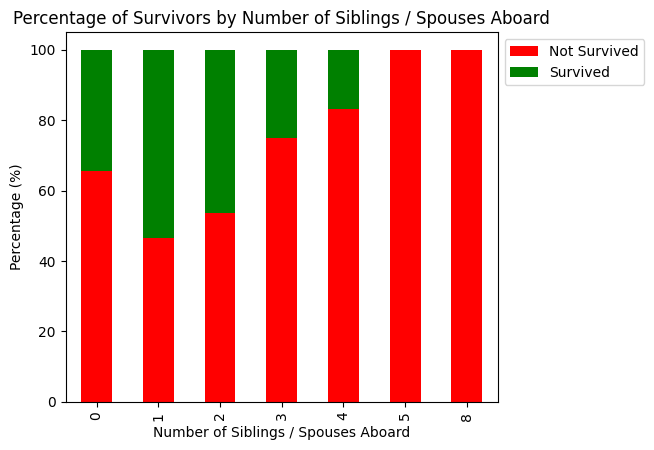

In [44]:
# Grupowanie danych według liczby rodzeństwa/małżonków i statusu przeżycia
survival_by_sibsp = train_data.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)

# Obliczanie odsetka przeżyłych i nieprzeżyłych dla liczby rodzeństwa/małżonków
survival_by_sibsp_percentage = survival_by_sibsp.div(survival_by_sibsp.sum(axis=1), axis=0) * 100

# Tworzenie wykresu słupkowego
survival_by_sibsp_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])

# Dodanie tytułu i etykiet osi
plt.title('Percentage of Survivors by Number of Siblings / Spouses Aboard')
plt.xlabel('Number of Siblings / Spouses Aboard')
plt.ylabel('Percentage (%)')

# Dodanie legendy
plt.legend(['Not Survived', 'Survived'], loc='upper left', bbox_to_anchor=(1, 1))

# Dostosowanie rozmiaru wykresu
plt.subplots_adjust(right=0.8)

# Wyświetlenie wykresu
plt.show()

### 2.7. Odsetek ocalałych według liczby rodziców i dzieci

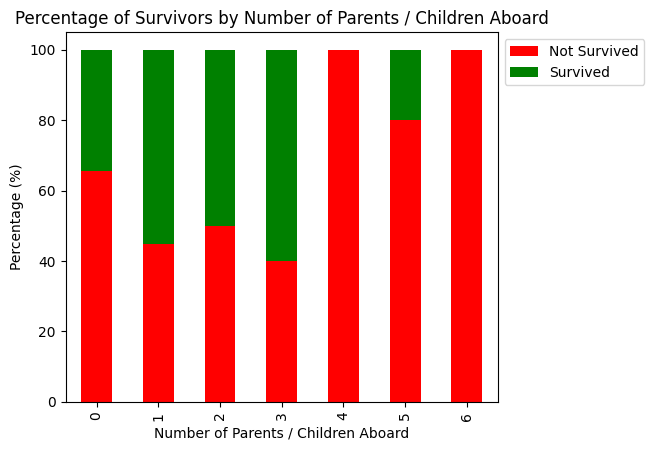

In [45]:
# Grupowanie danych według liczby rodziców/dzieci i statusu przeżycia
survival_by_parch = train_data.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)

# Obliczanie odsetka przeżyłych i nieprzeżyłych dla liczby rodziców/dzieci
survival_by_parch_percentage = survival_by_parch.div(survival_by_parch.sum(axis=1), axis=0) * 100

# Tworzenie wykresu słupkowego
survival_by_parch_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])

# Dodanie tytułu i etykiet osi
plt.title('Percentage of Survivors by Number of Parents / Children Aboard')
plt.xlabel('Number of Parents / Children Aboard')
plt.ylabel('Percentage (%)')

# Dodanie legendy
plt.legend(['Not Survived', 'Survived'], loc='upper left', bbox_to_anchor=(1, 1))

# Dostosowanie rozmiaru wykresu
plt.subplots_adjust(right=0.8)

# Wyświetlenie wykresu
plt.show()

Numery biletów zostały przez nas zignorowane.

### 2.8. Odsetek ocalałych według opłaty

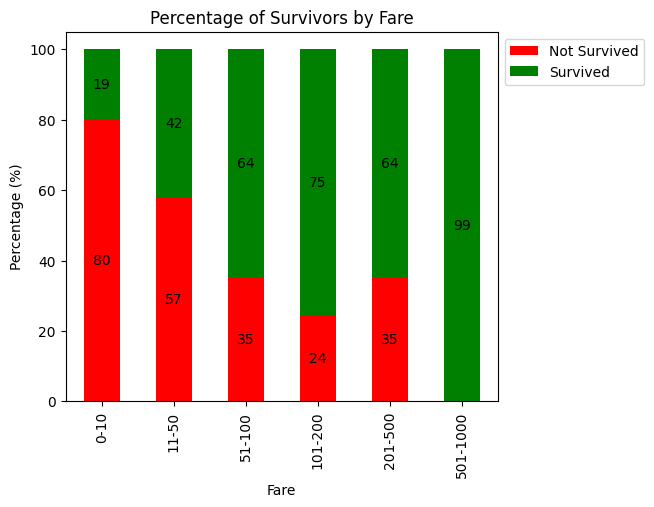

In [46]:
# Definicja przedziałów opłat
fare_bins = [0, 10, 50, 100, 200, 500, 1000]
fare_labels = ['0-10', '11-50', '51-100', '101-200', '201-500', '501-1000']

# Tworzenie nowej kolumny 'FareGroup' z przypisanymi etykietami przedziałów
train_data['FareGroup'] = pd.cut(train_data['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Grupowanie danych według 'FareGroup' i 'Survived'
survival_by_fare = train_data.groupby(['FareGroup', 'Survived'], observed=False).size().unstack(fill_value=0)

# Obliczanie odsetka przeżyłych i nieprzeżyłych
survival_by_fare_percentage = survival_by_fare.div(survival_by_fare.sum(axis=1), axis=0) * 100

# Tworzenie wykresu słupkowego
ax = survival_by_fare_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])

# Dodanie tytułu i etykiet osi
plt.title('Percentage of Survivors by Fare')
plt.xlabel('Fare')
plt.ylabel('Percentage (%)')

# Dodanie legendy
plt.legend(['Not Survived', 'Survived'], loc='upper left', bbox_to_anchor=(1, 1))

# Dodanie liczby pasażerów w każdej grupie opłat
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()  # (x, y) of the bar
    if height > 0:  # Dodanie etykiety tylko dla słupków z wartością większą niż zero
        ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2),
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=10, color='black')

# Dostosowanie rozmiaru wykresu
plt.subplots_adjust(right=0.8)

# Wyświetlenie wykresu
plt.show()